# fMRI data analysis - word and object processing
*Iga Adamska, Nicolaus Copernicus University, cognitive science*

The goal of this analysis is to perform a simple General Linear Model (GLM) analysis on fMRI data to investigate brain areas that are active during reading and object recognition (step 1). Later, based on the mean coordinates for word and object processing, a seed-to-voxel analysis will be performed (step 2). This step allows to check how well brain activity from subject one (`sub-01`) corresponds to the mean activation area. 

____________________________________________________________________________________________________________________________________________

This analysis was performed on the dataset obtained from the OpenfMRI project (http://www.openfmri.org); Accession: ds107.

References: Duncan, K.J., Pattamadilok, C., Knierim, I., Devlin, J.T. (2009). Consistency and variability in functional localisers. *Neuroimage*, 46(4):1018-26. doi: 10.1016/j.neuroimage.2009.03.014

# Step 1

General Linear Model (GLM) analysis on `sub-01` functional data. 

In [1]:
# Loading libraries

! pip install nistats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nistats.first_level_model import FirstLevelModel
from nistats.reporting import plot_design_matrix
from nistats.reporting import plot_contrast_matrix
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show
from nistats.thresholding import map_threshold
from nistats.reporting import get_clusters_table

C:\Users\Iga\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

 | Starting with Nilearn 0.7.0, all Nistats functionality has been incorporated into Nilearn's stats & reporting modules.
 | Nistats package will no longer be updated or maintained.

  
C:\Users\Iga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# Loading a table with events

events_path = "data/sub-01_func_sub-01_task-onebacktask_run-02_events.tsv"
events = pd.read_csv(events_path, sep="\t")
events.head()

,onset,duration,trial_type,0,1,2,3
0,0.0,0.35,Objects,cjdh,2,NR,NR
1,1.0,0.35,Objects,hdrg,2,NR,NR
2,2.0,0.35,Objects,hdrg,2,27,616
3,3.1,0.35,Objects,tgdjz,2,NR,NR
4,4.1,0.35,Objects,bzcrn,2,NR,NR


In [3]:
# Loading preprocessed fMRI image

fmri_img = "data/sub-01_func_sub-01_task-onebacktask_run-02_bold.nii"

In [4]:
# Fitting model to the data

t_r = 3

first_level_model = FirstLevelModel(t_r, hrf_model='spm',  high_pass=.01, smoothing_fwhm=8) 
first_level_model = first_level_model.fit(fmri_img, events=events) 

In [5]:
# Calculating design matrix

design_matrix = first_level_model.design_matrices_[0]

In [6]:
design_matrix.head()

,Consonant strings,Objects,Scrambled objects,Words,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,drift_7,drift_8,drift_9,constant
0.0,0.0,0.000000,0.0,0.0,0.110426,0.110411,0.110386,0.110350,0.110305,0.110249,0.110183,0.110107,0.110021,1.0
3.0,0.0,0.049021,0.0,0.0,0.110386,0.110249,0.110021,0.109703,0.109294,0.108794,0.108205,0.107527,0.106759,1.0
6.0,0.0,0.253227,0.0,0.0,0.110305,0.109925,0.109294,0.108412,0.107281,0.105904,0.104284,0.102426,0.100332,1.0
9.0,0.0,0.370097,0.0,0.0,0.110183,0.109440,0.108205,0.106484,0.104284,0.101616,0.098491,0.094924,0.090930,1.0
12.0,0.0,0.391397,0.0,0.0,0.110021,0.108794,0.106759,0.103932,0.100332,0.095987,0.090930,0.085197,0.078831,1.0


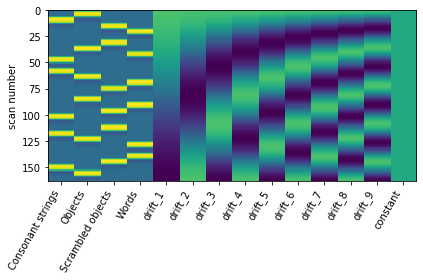

In [7]:
# Plotting design matrix

plot_design_matrix(design_matrix)

(-0.1, 0.6)

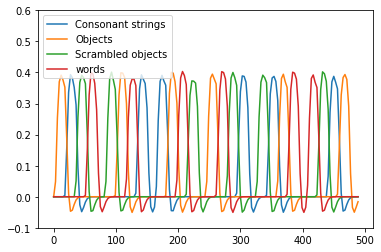

In [8]:
# Plotting timeseries

plt.plot(design_matrix[['Consonant strings', 'Objects', 'Scrambled objects', 'Words' ]])
plt.legend(['Consonant strings', 'Objects', 'Scrambled objects', 'words'])
plt.ylim([-0.1, 0.6])

In [9]:
# Creating conditions

conditions = {'Consonant strings': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0]), 
              'Objects': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0]),
              'Scrambled objects': np.array([0, 0, 1, 0, 0, 0, 0, 0, 0,0,0,0,0,0]),
              'Words': np.array([0, 0, 0, 1, 0, 0, 0, 0, 0,0,0,0,0,0])}

In [11]:
# Creating contrasts

strings_effect = conditions['Consonant strings']
objects_effect = conditions['Objects']
s_objects_effect = conditions['Scrambled objects']
words_effect = conditions['Words']

objects_minus_s_objects = conditions['Objects'] - conditions['Scrambled objects']
strings_minus_words = conditions['Consonant strings'] - conditions['Words']

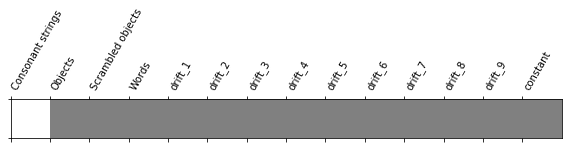

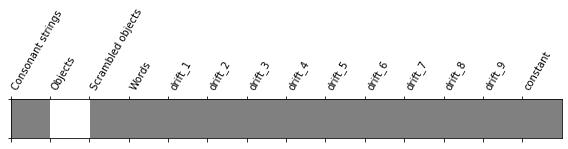

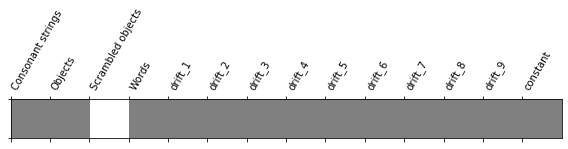

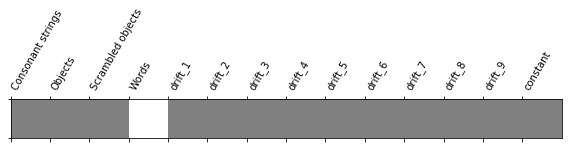

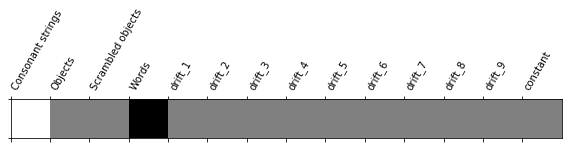

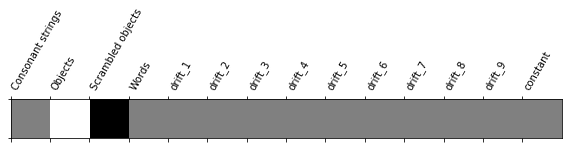

In [12]:
# Plotting contrasts

plot_contrast_matrix(strings_effect, design_matrix=design_matrix) 
plot_contrast_matrix(objects_effect, design_matrix=design_matrix) 
plot_contrast_matrix(s_objects_effect, design_matrix=design_matrix) 
plot_contrast_matrix(words_effect, design_matrix=design_matrix) 
plot_contrast_matrix(strings_minus_words, design_matrix=design_matrix) 
plot_contrast_matrix(objects_minus_s_objects, design_matrix=design_matrix) 

Uncorrected p<0.001 threshold: 5.176


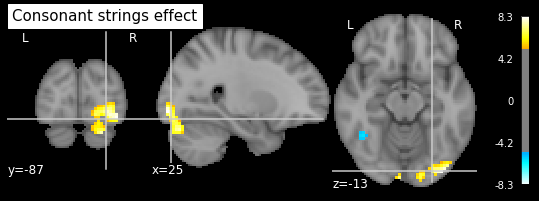

In [13]:
# Statistic test for consonant strings effect

string_map = first_level_model.compute_contrast(strings_effect, output_type='z_score')
_, threshold = map_threshold(string_map, alpha=.01, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_stat_map(string_map, threshold=threshold, display_mode='ortho',  black_bg=True, title="Consonant strings effect")
plt.show()

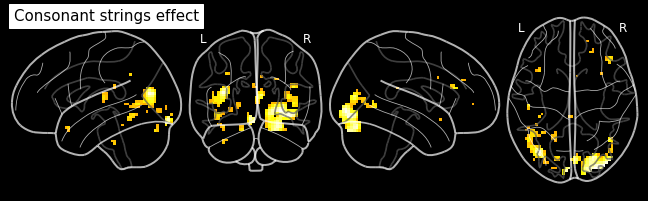

In [21]:
# Plotting consonant strings effect on glass brain

from nilearn.plotting import plot_glass_brain

plot_glass_brain(string_map, title='Consonant strings effect', display_mode='lyrz', threshold=threshold, black_bg=True)
plt.show()

Uncorrected p<0.001 threshold: 5.176


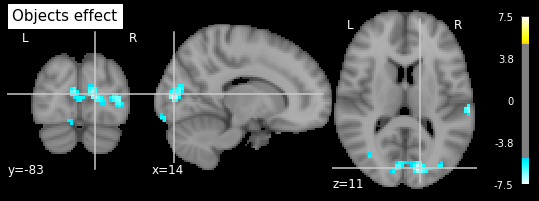

In [16]:
# Statistic test for consonant objects effect

objects_map = first_level_model.compute_contrast(objects_effect, output_type='z_score')
_, threshold = map_threshold(objects_map, alpha=.01, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_stat_map(objects_map, threshold=threshold, display_mode='ortho', black_bg=True,title="Objects effect")
plt.show()

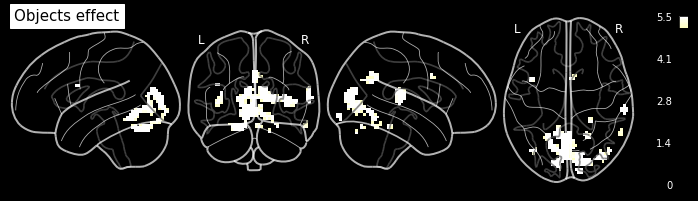

In [22]:
# Plotting objects strings effect on glass brain

plot_glass_brain(objects_map, title='Objects effect', display_mode='lyrz', threshold=threshold, black_bg=True, colorbar=True)
plt.show()

Uncorrected p<0.001 threshold: 5.176


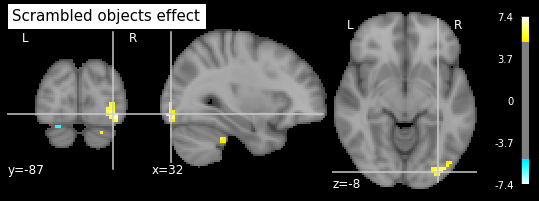

In [23]:
# Statistic test for scrabled objects effect

s_objects_map = first_level_model.compute_contrast(s_objects_effect, output_type='z_score')
_, threshold = map_threshold(s_objects_map, alpha=.01, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_stat_map(s_objects_map, threshold=threshold, display_mode='ortho', black_bg=True, title="Scrambled objects effect")
plt.show()

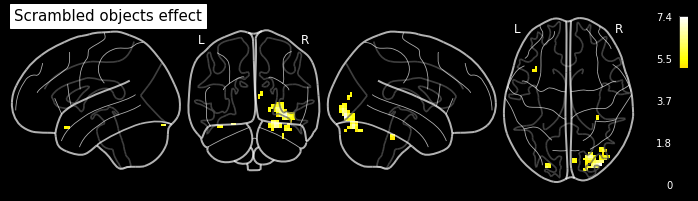

In [24]:
# Plotting scrambled objects strings effect on glass brain

plot_glass_brain(s_objects_map, title='Scrambled objects effect', display_mode='lyrz', threshold=threshold, black_bg=True, colorbar=True)
plt.show()

Uncorrected p<0.001 threshold: 5.176


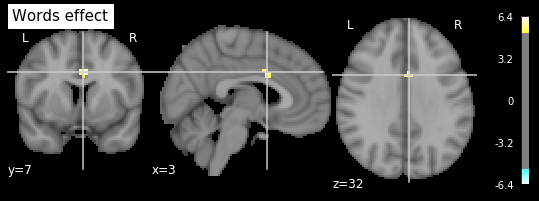

In [25]:
# Statistic test for words effect

words_map = first_level_model.compute_contrast(words_effect, output_type='z_score')
_, threshold = map_threshold(words_map, alpha=.01, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_stat_map(words_map, threshold=threshold, display_mode='ortho', black_bg=True, title="Words effect")
plt.show()

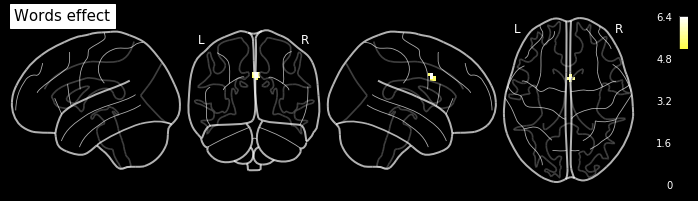

In [26]:
# Plotting words effect on a glass brain

plot_glass_brain(words_map, title='Words effect', display_mode='lyrz', threshold=threshold, black_bg=True, colorbar=True)
plt.show()

Uncorrected p<0.001 threshold: 5.176


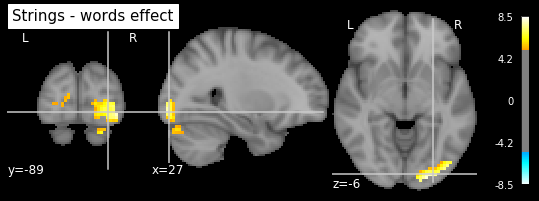

In [29]:
# Statistic test for strings - words effect

strings_minus_words_map = first_level_model.compute_contrast(strings_minus_words, output_type='z_score')
_, threshold = map_threshold(strings_minus_words_map, alpha=.01, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_stat_map(strings_minus_words_map, threshold=threshold, display_mode='ortho', black_bg=True, title="Strings - words effect")
plt.show()

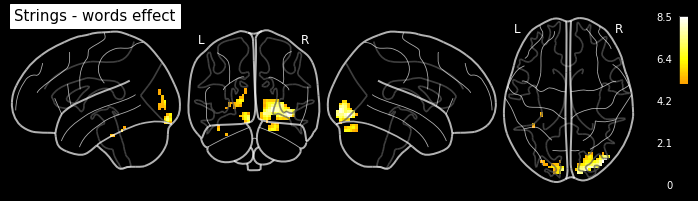

In [30]:
# Plotting strings - words effect on a glass brain

plot_glass_brain(strings_minus_words_map, title='Strings - words effect', display_mode='lyrz', threshold=threshold, black_bg=True, colorbar=True)
plt.show()

Uncorrected p<0.001 threshold: 5.176


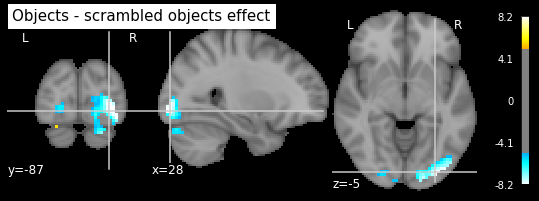

In [31]:
# Statistic test for objects - scrambled objects effect

objects_minus_s_objects_map = first_level_model.compute_contrast(objects_minus_s_objects, output_type='z_score')
_, threshold = map_threshold(objects_minus_s_objects_map, alpha=.01, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_stat_map(objects_minus_s_objects_map, threshold=threshold, display_mode='ortho', black_bg=True, title="Objects - scrambled objects effect")
plt.show()

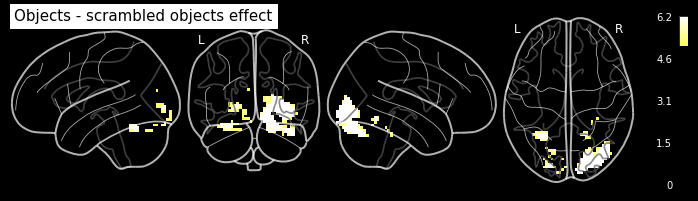

In [32]:
# Plotting objects - scrambled objects effect on a glass brain

plot_glass_brain(objects_minus_s_objects_map, title='Objects - scrambled objects effect', display_mode='lyrz', threshold=threshold, black_bg=True, colorbar=True)
plt.show()

# Step 2

Seed-to-voxel analysis for word and object processing for `sub-01` functional data.

Mean coordinates for word and object processing were obtained based on data from 49 subjects.
____________________________________________________________________________________________________________________________________________

**Seed to voxel analysis for word processing**

*Mean coordinates: 42, -62, -16 (ventral occipito-temporal cortex)*

In [33]:
# Loading libraries

import numpy as np
from nilearn import datasets
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

In [34]:
# Loading fMRI data

fmri_file = "data/sub-01_func_sub-01_task-onebacktask_run-02_bold.nii"

In [37]:
# Creating a seed for word processing

otc_words_coords = [(-42,-62,-16)]
seed_masker = input_data.NiftiSpheresMasker(otc_words_coords, radius=8,detrend=True, standardize=True)

In [38]:
# Extracitng timeseries from a seed

seed_timeseries = seed_masker.fit_transform(fmri_file)
seed_timeseries = np.squeeze(seed_timeseries)

In [39]:
print(seed_timeseries.shape)

(164,)


In [40]:
# Extracting timeseries from brain regions

brain_masker = input_data.NiftiMasker(smoothing_fwhm=8, detrend=True, standardize=True, memory='nilearn_cache', memory_level=1, verbose=0)
brain_timeseries = brain_masker.fit_transform(fmri_file)

In [41]:
print(brain_timeseries.shape)

(164, 143308)


In [42]:
# Calculating seed to voxel correlation

seed_to_voxel_correlations = (np.dot(brain_timeseries.T, seed_timeseries) /
                              seed_timeseries.shape[0])

In [43]:
# Calculating Pearson correlation coefficient 

from scipy import stats

corr_map = np.zeros(brain_timeseries.shape[1])

for i in range(brain_timeseries.shape[1]):
    corr_map[i] = stats.pearsonr(seed_timeseries, brain_timeseries[:,i])[0]

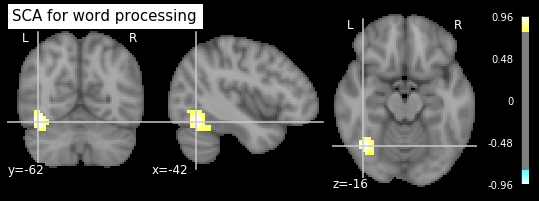

In [44]:
# Plotting correlation using statistical map plot

seed_to_voxel_correlations_img = brain_masker.inverse_transform(corr_map.T)
plotting.plot_stat_map(seed_to_voxel_correlations_img, cut_coords=(-42,-62,-16), threshold=0.8, colorbar=True, title="SCA for word processing", black_bg=True)

plt.show()

**Seed to voxel analysis for object processing**

*Mean coordinates: -43, -77, -8  (lateral occipito-temporal cortex)*

In [45]:
# Creating a seed for object processing

otc_objects_coords = [(-43,-77,-8)]
seed_masker = input_data.NiftiSpheresMasker(otc_objects_coords, radius=8,detrend=True, standardize=True)

In [46]:
# Extracting timeseries from a seed 

seed_timeseries_1 = seed_masker.fit_transform(fmri_file)
seed_timeseries_1 = np.squeeze(seed_timeseries)

In [47]:
print(seed_timeseries_1.shape)

(164,)


In [48]:
# Extracting timeseries from brain regions

brain_masker = input_data.NiftiMasker(smoothing_fwhm=8, detrend=True, standardize=True, memory='nilearn_cache', memory_level=1, verbose=0)
brain_timeseries_1 = brain_masker.fit_transform(fmri_file)

In [49]:
print(brain_timeseries_1.shape)

(164, 143308)


In [50]:
# Calculating seed to voxel correlation

seed_to_voxel_correlations_1 = (np.dot(brain_timeseries_1.T, seed_timeseries_1) /
                              seed_timeseries_1.shape[0])

In [51]:
# Calculating Pearson correlation coefficient 

corr_map_1 = np.zeros(brain_timeseries_1.shape[1])

for i in range(brain_timeseries_1.shape[1]):
    corr_map_1[i] = stats.pearsonr(seed_timeseries_1, brain_timeseries_1[:,i])[0]

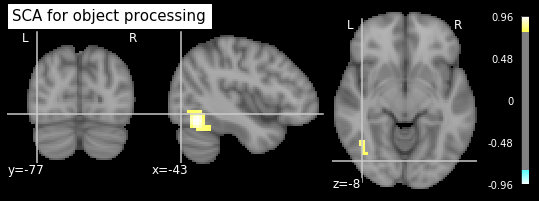

In [52]:
# Plotting correlation using statistical map plot

seed_to_voxel_correlations_img_1 = brain_masker.inverse_transform(corr_map_1.T)
plotting.plot_stat_map(seed_to_voxel_correlations_img_1, cut_coords=(-43,-77,-8), threshold=0.8, colorbar=True, 
                       title = "SCA for object processing", black_bg=True)

plt.show()